# Imports

In [2]:
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import cv2 as cv

#Lista 1

### André dos Santos e Lael Santa Rosa

### Questão 1

Implemente uma função que receba o tamanho n de um filtro espacial com dimensções n × n, e a matriz com os pesos do filtro, e aplique o filtro numa imagem, gerando e salvando a imagem resultante no disco.

In [ ]:
!mkdir -p /content/images/q1
!wget -q https://www.wasaweb.net/images/stock-images/512x512/flowers-178.jpg -O /content/images/q1/flower.jpg

In [ ]:
def filter_apply(kernel, n):

    P = 0 #padding
    S = 1 #stride

    image = cv.imread("/content/images/q1/flower.jpg", cv.IMREAD_GRAYSCALE)
    image = cv.resize(image , (512,512))
    new_size = int((((image.shape[0] - n + 2*P)/S) + 1)) #size of output image after convolution

    out_image = np.zeros((new_size, new_size)) #create output image with zeros

    for i in range(new_size):
        for j in range(new_size):
            mat = image[i:i+n, j:j+n] #slice original image to kernel convolution
            out_image[i, j] = np.sum(np.multiply(mat, kernel))

    cv.imwrite("/content/images/q1/flower_after_filter.jpg", out_image)


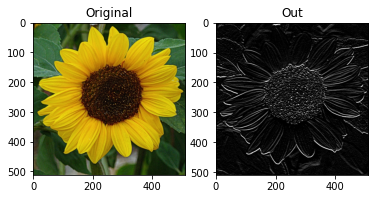

In [ ]:
kernel = np.array([
                   [1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]
])

filter_apply(kernel, kernel.shape[0])

plt.subplot(1, 2, 1)
plt.title(f"Original")
plt.imshow(cv.cvtColor(cv.imread("/content/images/q1/flower.jpg"), cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title(f"Out")
plt.imshow(cv.cvtColor(cv.imread("/content/images/q1/flower_after_filter.jpg"), cv.COLOR_BGR2RGB))
plt.show()

### Questão 2
Implemente dois tipos de filtro para remoção de ruídos e aplique-os
em três imagens distintas.

In [ ]:
!mkdir -p /content/images/q2

!wget -q https://cdn1.buyacar.co.uk/sites/buyacar/files/styles/w860/public/aston-martin-dbx-1_0.jpg -O /content/images/q2/img1.jpg
!wget -q http://content.health.harvard.edu/wp-content/uploads/2022/02/b599a20a-a453-425a-9d2f-fa2ff8ba2776.jpg -O /content/images/q2/img2.jpg
!wget -q https://files.worldwildlife.org/wwfcmsprod/images/Lion_WWFGIFTS_cover_2020/magazine_small/2wafu1bmcz_b21fc8e6.jpeg -O /content/images/q2/img3.jpeg

In [ ]:
def gaussian_filter(n, sigma):
    t = np.linspace(-(n - 1) / 2., (n - 1) / 2., n)
    x, y = np.meshgrid(t, t)
    gauss_kernel = np.divide(np.exp(-(x**2 + y**2) / (2 * sigma**2)), ( 2.0 * np.pi * sigma**2))
    return gauss_kernel

def mean_filter(n):
    return np.ones((n,n)) / (n**2)

def filter_RGB_apply(image, filter):
    image_after_filter = cv.filter2D(image, ddepth=-1, kernel=filter)
    return image_after_filter.astype(np.uint8)

In [ ]:
n = 7

filter1 = gaussian_filter(n, 1.0)
filter2 = mean_filter(n)

image_paths = glob("/content/images/q2/*")

for image_path in image_paths:

    image = cv.cvtColor(cv.imread(image_path), cv.COLOR_BGR2RGB)

    image_f1 = filter_RGB_apply(image.copy(), filter1)
    image_f2 = filter_RGB_apply(image.copy(), filter2)

    plt.figure(figsize = (20, 12))

    plt.subplot(131)
    plt.imshow(image.astype(np.uint8))
    plt.title("Original image")
    plt.xticks([])
    plt.yticks([])

    plt.subplot(132)
    plt.imshow(image_f1)
    plt.title(f"Image after Gaussian Filter")
    plt.xticks([])
    plt.yticks([])

    plt.subplot(133)
    plt.imshow(image_f2)
    plt.title(f"Image after Mean Filter")
    plt.xticks([])
    plt.yticks([])

    plt.show()

### Questão 3

Pesquise um filtro passa-alta e aplique-o em 3 imagens distintas,
variando o valor de n em 3 unidades em cada imagem. O que acontece
quando n cresce?

In [ ]:
!mkdir -p /content/images/q3

!wget -q http://d3ugyf2ht6aenh.cloudfront.net/stores/263/815/products/tijolo-041-d0100501d779abefc415131794733470-640-0.jpg -O /content/images/q3/img1.jpg
!wget -q https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcQCO7tvV1XAYPSLzwAoHChtoYwS4B-ZPTmrPAsrB6CWb3DM28hk -O /content/images/q3/img2.jpg
!wget -q https://www.bemcolar.com/media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/p/a/papel-de-parede-bicicleta.jpg -O /content/images/q3/img3.jpg

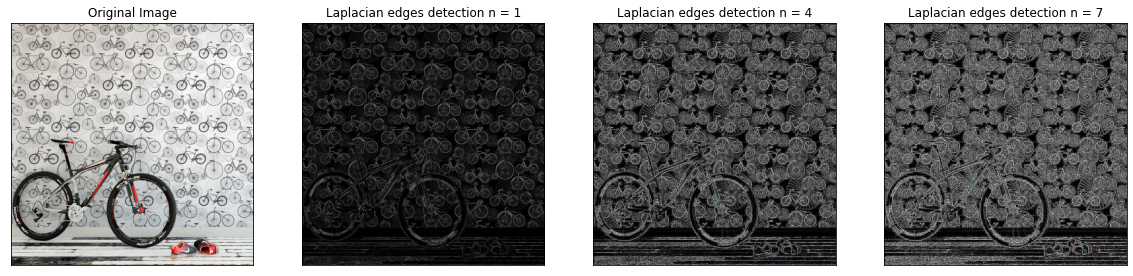

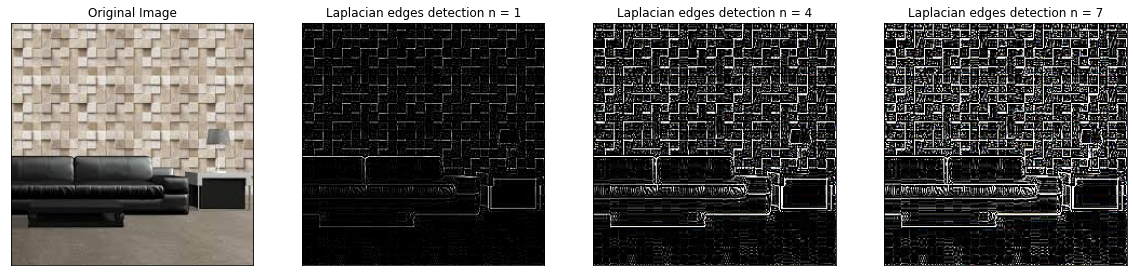

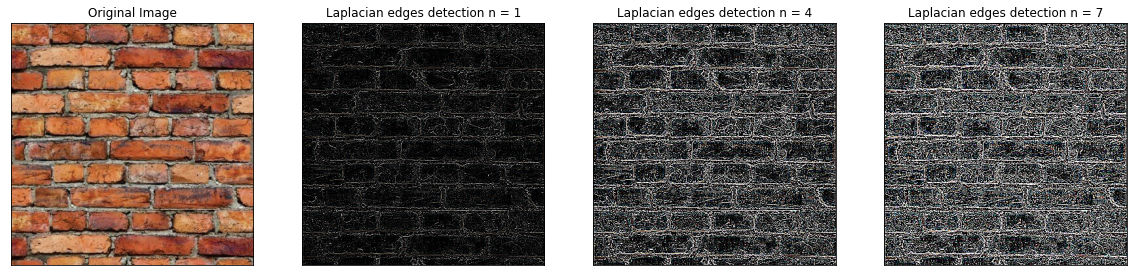

In [ ]:

ns = [1, 4, 7]
for path in glob("/content/images/q3/*"):

  plt.figure(figsize = (20, 12))
  image = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)

  plt.subplot(1, 4, 1)
  plt.imshow(image.copy())
  plt.title(f"Original Image")
  plt.xticks([])
  plt.yticks([])

  for i, n in enumerate(ns):    

    plt.subplot(1, 4, i+2)
    laplacian = cv.Laplacian(image, -1, ksize=1, scale=n, delta=0, borderType=cv.BORDER_DEFAULT)
    plt.imshow((laplacian))
    plt.title(f"Laplacian edges detection n = {n}")
    plt.xticks([])
    plt.yticks([])
  
  plt.show()

#### Resposta:

  Quando o valor de n aumenta, não apenas as bordas são detectadas mas a imagem vai virando um grande ruído.

### Questao 4

Pesquise um filtro passa-baixa e aplique-o em 3 imagens distintas, variando o valor de n em 3 unidades em cada imagem. O que acontece quando n cresce?

In [ ]:
!mkdir -p /content/images/q4

!wget -q https://images.snapwi.re/45ea/57e343e6187bfa59077b23c6.w800.jpg -O /content/images/q4/img1.jpg
!wget -q https://childdevelopment.com.au/wp-content/uploads/what-is-child-development.jpg -O /content/images/q4/img2.jpg
!wget -q https://cdn.mos.cms.futurecdn.net/464QUPXKVDdmNDACrDzxtj-1024-80.jpg -O /content/images/q4/img3.jpg

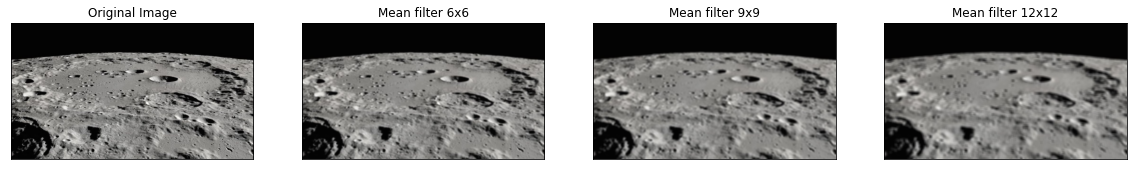

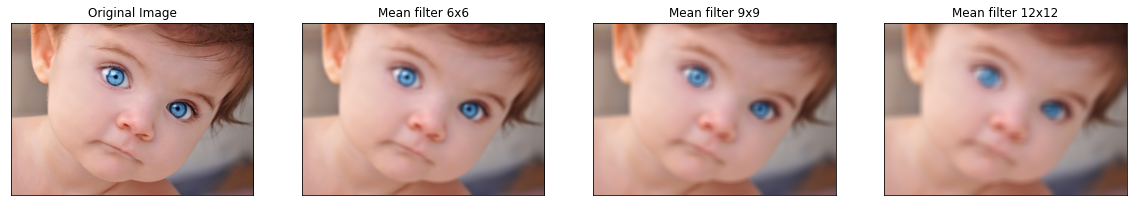

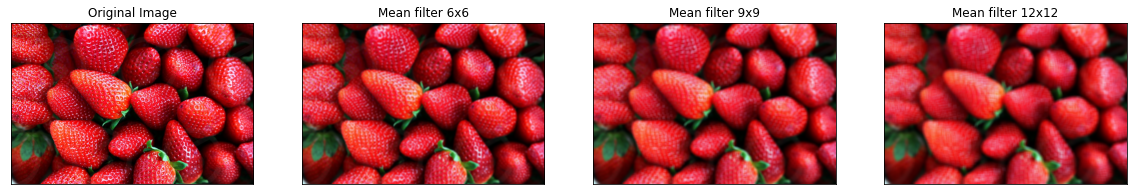

In [ ]:
ns = [6, 9, 12]
  
for path in glob("/content/images/q4/*"):

  plt.figure(figsize = (20, 12))
  image = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)

  plt.subplot(1, 4, 1)
  plt.imshow(image.copy())
  plt.title(f"Original Image")
  plt.xticks([])
  plt.yticks([])

  for i, n in enumerate(ns):    

    kernel = mean_filter(n)

    plt.subplot(1, 4, i+2)
    plt.imshow(filter_RGB_apply(image.copy(), kernel))
    plt.title(f"Mean filter {n}x{n}")
    plt.xticks([])
    plt.yticks([])
  
  plt.show()

#### Resposta:

Quando o valor de n aumenta, a intensidade do 'blur' torna-se mais forte

### Questão 5

Aplique o detector de canny usando a função Canny() do OpenCV
em uma ou mais imagens de sua escolha. Experimente variar os parâmetros threshold1, threshold2 e apertureSize. Explique com suas palavras a influência de cada parâmetro no resultado.

In [3]:
!mkdir -p /content/images/q5
!wget -q https://images-na.ssl-images-amazon.com/images/I/41r1kAwj19L.jpg -O /content/images/q5/img1.jpg

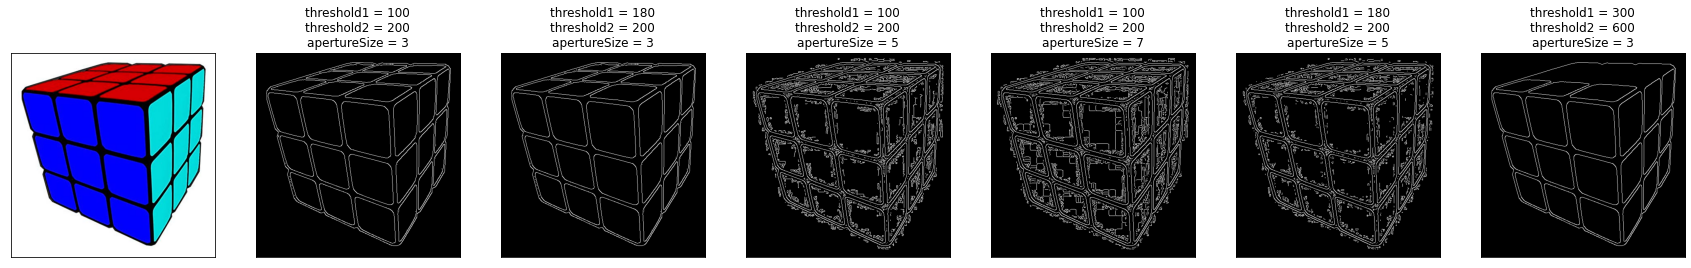

In [53]:
#conf = [[threshold1, threshold2, apertureSize]...]

confs = [[100, 200, 3], [180, 200, 3], [100, 200, 5], [100, 200, 7], [180, 200, 5], [300, 600, 5]]
image = cv.imread("/content/images/q5/img1.jpg")

plt.figure(figsize=(30,20))

col = len(confs) + 1

plt.subplot(1, col, 1)
plt.imshow(image)
plt.xticks([])
plt.yticks([])

for i, conf in enumerate(confs):

    output = cv.Canny(image.copy(), conf[0], conf[1], apertureSize = conf[2], L2gradient = True)
    plt.subplot(1, col, i+2)
    plt.imshow(output, cmap="gray")
    plt.title(f"threshold1 = {conf[0]}\nthreshold2 = {conf[1]}\napertureSize = {conf[2]}")
    plt.xticks([])
    plt.yticks([])

plt.show()

Os thresholds definem os intervalores para considerar uma candidata a aresta como aresta verdadeira, pelos experimentos acima, threshold1 deve ser menor que o threshold2, alem disso ao aumentar os valores de thresholds é desejavel aumentar o tamanho de apertureSize. Manter os thresholds fixos e aumentar  apertureSize tenda a adicionar bastante arestas não fortes ao resultado final

### Questão 6

Um filtro passa-baixa bastante conhecido é o filtro Gaussiano.
Através de uma máscara determinada por um desvio padrão $\sigma$, é possível
fazer o que chamamos de suavização gaussiana de uma imagem. Considere o filtro 5x5 de desvio padrão unitário abaixo:

g = 

    [1/273  4/273  7/273  4/273 1/273]
    [4/273 16/273 26/273 16/273 4/273]
    [7/273 26/273 41/273 26/273 7/273]
    [4/273 16/273 26/273 16/273 4/273]
    [1/273  4/273  7/273  4/273 1/273]

Crie uma imagem I de dimensões 100 × 100 que contém um único valor não nulo localizado no centro da imagem. Utilizando o filtro gaussiano acima, calcule e exiba I∗g, onde ∗  é a notaçãoo para o operador de convolução.

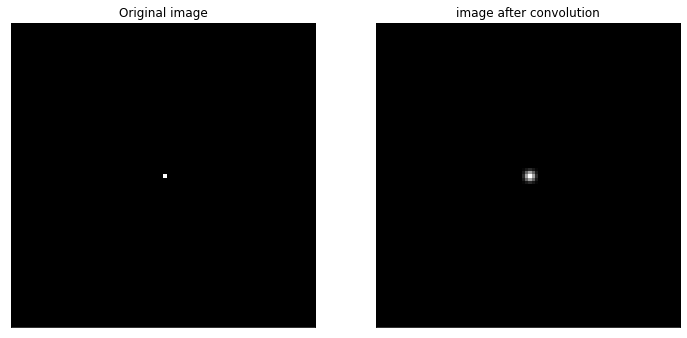

In [ ]:
img_size = 100

gaussian_filter = np.array( 
    [[1/273,  4/273,  7/273,  4/273, 1/273],
    [4/273, 16/273, 26/273, 16/273, 4/273],
    [7/273, 26/273, 41/273, 26/273, 7/273],
    [4/273, 16/273, 26/273, 16/273, 4/273],
    [1/273,  4/273,  7/273,  4/273, 1/273]]
)

image = np.zeros((img_size, img_size))
image[img_size//2, img_size//2] = np.random.randint(0, 50, 1)
new_image = cv.filter2D(image, ddepth=-1, kernel = gaussian_filter)

plt.figure(figsize = (12, 8))

plt.subplot(121)
plt.imshow(image.astype(np.uint8), cmap="gray")
plt.title("Original image")
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(new_image, cmap="gray")
plt.title(f"image after convolution")
plt.xticks([])
plt.yticks([])

plt.show()

### Questão 8

Implemente uma função que reduza um ou aumente a resolução
da imagem por fatores (sx, sy). Você só pode usar o OpenCV para carregar
a imagem. Se s < 1, implemente o algoritmo do slide 4. Se s > 1, use
interpolação por vizinho mais próximo (slide 23). Aplique em três imagens
distintas.

In [ ]:
!mkdir -p /content/images/q8

!wget -q https://cdn.xxl.thumbs.canstockphoto.com/cat-eats-fresh-fish-burger-in-restaurant-the-beige-cat-in-a-neck-napkin-with-a-knife-and-a-fork-is-stock-photography_csp81085001.jpg  -O /content/images/q8/img1.jpg
!wget -q https://i.kym-cdn.com/photos/images/original/001/250/216/305.jpg -O /content/images/q8/img2.jpg
!wget -q https://discovery.sndimg.com/content/dam/images/discovery/fullset/2021/10/21/GettyImages-1136552388%202.jpg.rend.hgtvcom.406.406.suffix/1634848243966.jpeg -O /content/images/q8/img3.jpg


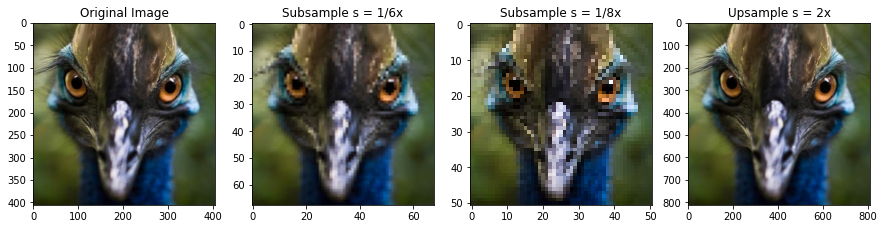

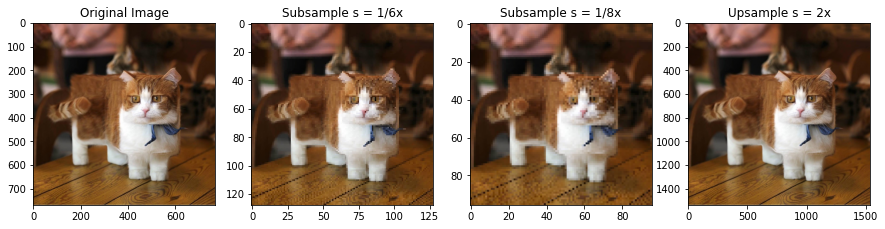

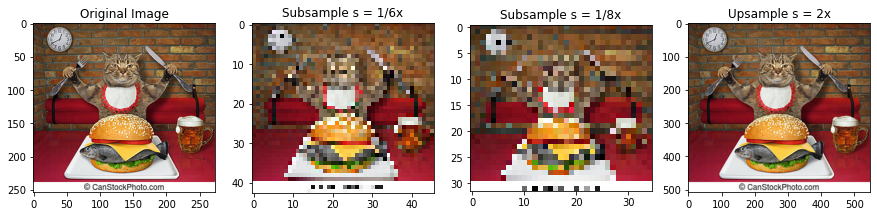

In [ ]:
subS = [6, 8]
upS = [2]

for path in glob("/content/images/q8/*"):

  image = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)

  plt.figure(figsize=(15,15))
  plt.subplot(1, 4, 1)
  plt.imshow(image)
  plt.title(f"Original Image")

  for i, s in enumerate(subS):
    plt.subplot(1, 4, 2+i)
    plt.title(f"Subsample s = 1/{s}x")
    plt.imshow(image[::s,::s])

  plt.subplot(1, 4, 4)
  plt.title(f"Upsample s = {upS[0]}x")
  plt.imshow(image.repeat(upS[0], axis=0).repeat(upS[0], axis=1))
  
  plt.show()

### Questão 9

Escolha uma imagem interessante e gere uma pirâmide aplicando
sucessivamente downsampling 3 vezes com fator 1/2. Faça o mesmo com
uma pirâmide gaussiana e compare os resultados. Mostre os resultados de
cada pirâmide em uma  ́unica imagem lado a lado, como nos slides da aula
(vai exigir algumas operações de translação de imagens). Obs.: aqui você
pode usar funções do OpenCV.

### Questão 10

Usando as funções que você implementou, crie funçôes que apliquem filtros para calcular as imagens representando 
$\frac{∂f}{∂x}$, $\frac{∂f}{∂y}$  e $|\nabla f|$. Implemente também as mesmas usando o operador de Sobel. Aplique-as diretamente em algumas imagens de sua escolha, e compare o efeito do ruído.